In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!"c:/Users/Priyanshu Bhaskar/.conda/envs/myenv/python.exe" -m pip install seaborn

import sys
print(sys.executable)
import seaborn as sns
import matplotlib.pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\python.exe


In [90]:
!"c:/Users/Priyanshu Bhaskar/.conda/envs/myenv/python.exe" -m pip install pandas



In [91]:
import pandas as pd
print(pd.__version__)


1.1.5


In [92]:
import sys
!"{sys.executable}" -m pip install pandas


### EDA

In [93]:
df = pd.read_csv(r"C:\Users\Priyanshu Bhaskar\Downloads\Froad_detection\FastagFraudDetection.csv")
df.head()





,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [94]:
df.shape

(5000, 13)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [96]:
#to find is there is a null or not 
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

### Total null value is in FastagID 549 

In [97]:
df.duplicated().sum()

0

In [98]:
#describe or get the statistical description
df.describe()


,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [99]:
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-814-KJH-098,B-102,Regular,Large,"13.042660878688794, 77.47580097259879",KA01AB8901,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


In [100]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [101]:
df['Vehicle_Type'].unique()

array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object)

In [102]:
print("Unique Vehicle Type:", df['Vehicle_Type'].unique())
print("Unique TollBoothID:", df['TollBoothID'].unique())
print("Unique Lane_Type:", df['Lane_Type'].unique())
print("Unique Vehicle_Dimensions:", df['Vehicle_Dimensions'].unique())
print("Unique Fraud_indicator:", df['Fraud_indicator'].unique())
print("Unique Geographical_Location:", df['Geographical_Location'].unique())


Unique Vehicle Type: ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID: ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane_Type: ['Express' 'Regular']
Unique Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Unique Fraud_indicator: ['Fraud' 'Not Fraud']
Unique Geographical_Location: ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


# Data Visualization

In [103]:
#import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64


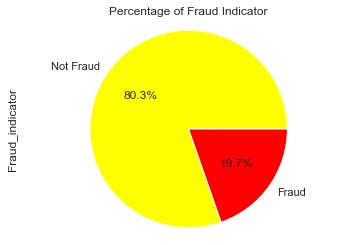

In [104]:
print(df['Fraud_indicator'].value_counts())
df['Fraud_indicator'].value_counts().plot(kind='pie',autopct = '%1.1f%%',colors = ['yellow','red'])
plt.title("Percentage of Fraud Indicator")
plt.axis('equal')
plt.show()

## Analysis of different columns
** # Based on Froud indicator# **

In [105]:
df['Vehicle_Type'].value_counts()

Bus           716
Van           714
Car           714
Truck         714
Sedan         714
Motorcycle    714
SUV           714
Name: Vehicle_Type, dtype: int64

Text(0.5, 1.0, 'Vehicle Type')

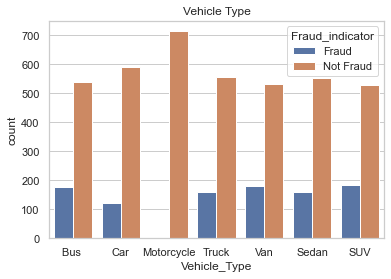

In [106]:
# Vehicle Type
sns.countplot(x='Vehicle_Type',data =df, hue='Fraud_indicator').set_title('Vehicle Type')

<AxesSubplot:xlabel='Vehicle_Dimensions', ylabel='count'>

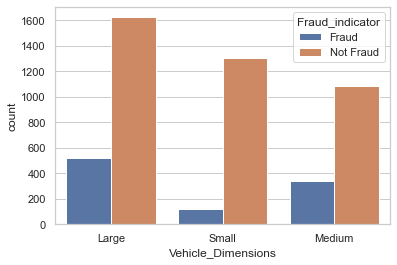

In [107]:
# Vehicle Dimensions 
sns.countplot(x='Vehicle_Dimensions',data =df, hue='Fraud_indicator')

Text(0.5, 1.0, 'Different Tollbooths')

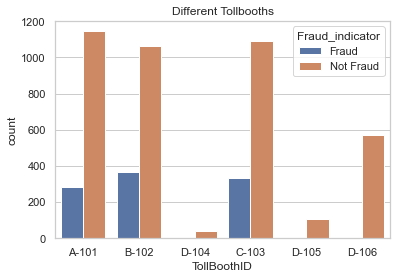

In [108]:
#TollBoothID 
sns.countplot(x='TollBoothID',data =df, 
              hue='Fraud_indicator').set_title('Different Tollbooths')

Text(0.5, 1.0, 'Different Lans')

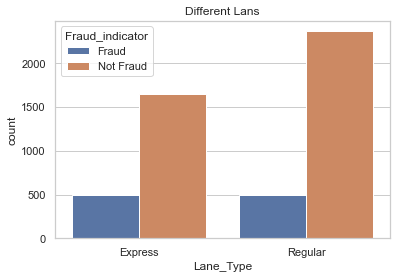

In [109]:
#Lane Type
sns.countplot(x='Lane_Type',data =df, 
              hue='Fraud_indicator').set_title('Different Lans')

Text(0.5, 1.0, 'Different Lans')

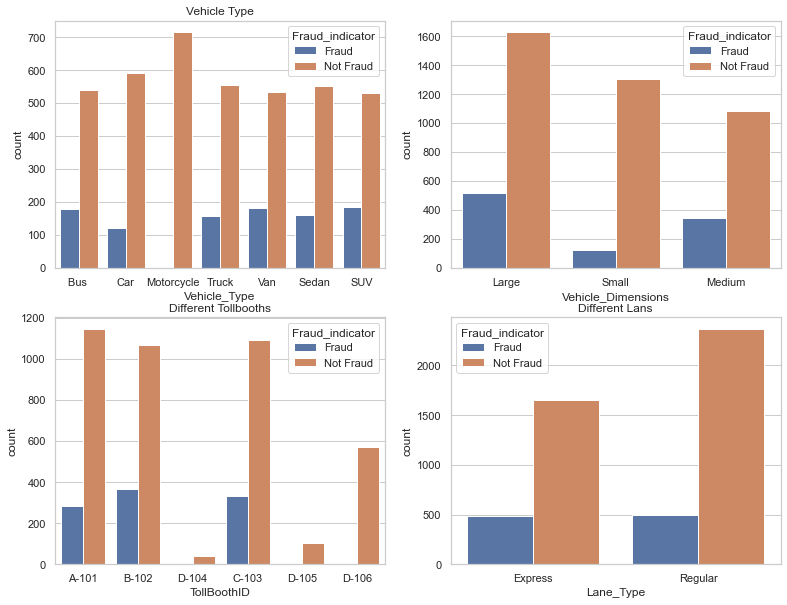

In [110]:
# combining all graphs together
fig,axes = plt.subplots(2,2, figsize=(13,10))
# Vehicle Type
sns.countplot(x='Vehicle_Type',data =df, 
              hue='Fraud_indicator',
             ax=axes[0,0]).set_title('Vehicle Type')
# Vehicle Dimensions 
sns.countplot(x='Vehicle_Dimensions',data =df, hue='Fraud_indicator',
              ax=axes[0,1]
             )
#TollBoothID 
sns.countplot(x='TollBoothID',data =df, 
              hue='Fraud_indicator',
             ax = axes[1,0]).set_title('Different Tollbooths'
                                              )
#Lane Type
sns.countplot(x='Lane_Type',data =df, 
              hue='Fraud_indicator',
             ax = axes[1,1]).set_title('Different Lans')

### Observation
1. Motorcycles are clean
2. Toll boots 104,105 & 106 are clean 101,102,103 are not
3. Expressway has a higher fraud % based on the vehicle than regular
   

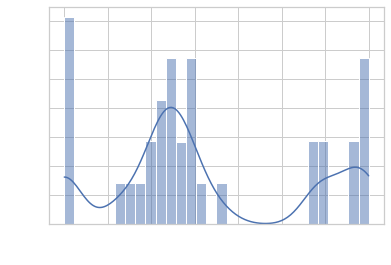

In [111]:
#distribution of transaction amount
sns.histplot(df["Transaction_Amount"],bins=30,kde = True)
#df.columns
plt.xlabel("Transaction Amount", color="white")  # X-label color
plt.ylabel("Count", color="white")              # Y-label color

# Also change tick colors if needed
plt.xticks(color="white")


plt.yticks(color="white")

plt.show()

distribution of paid amount

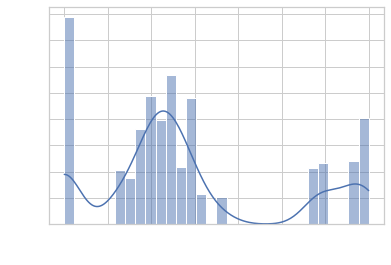

In [112]:
sns.histplot(df['Amount_paid'],bins=30,kde=True)
plt.xticks(color="white")

plt.xlabel("Amount_paid", color="white")  # X-label color
plt.ylabel("Count", color="white")              # Y-label color
plt.yticks(color="white")

plt.show()

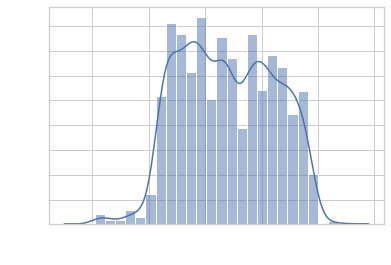

In [113]:
#Vehicle Speed

sns.histplot(df['Vehicle_Speed'],bins=30,kde=True)
plt.xticks(color="white")

plt.xlabel("Vehicle_Speed", color="white")  # X-label color
plt.ylabel("Count", color="white")              # Y-label color
plt.yticks(color="white")

plt.show()

Relationship between transaction Amount and paid amount

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

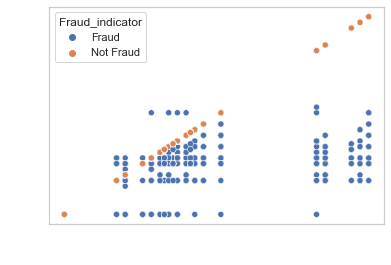

In [114]:
sns.scatterplot(x='Transaction_Amount',
                y = 'Amount_paid',
                hue='Fraud_indicator',data=df)
plt.xticks(color="white")
plt.grid()

plt.xlabel("Transaction_Amount", color="white")  # X-label color
plt.ylabel("Amount_paid", color="white")              # Y-label color
plt.yticks(color="white")


Observation 3
1.when Transaction Amount is not equal to amount pai => Fraud
2.When Trnsaction amount is equal to Amount => Not Fraud

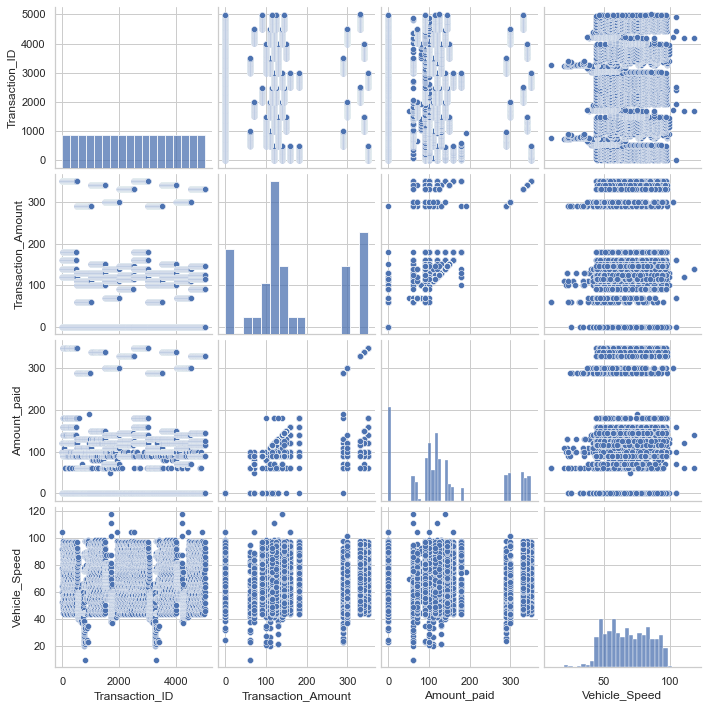

In [115]:
#pair plot
sns.pairplot(df)

Feaature Extraction

In [116]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [117]:
df['FastagID'].mode()[0]


'FTG-000-QAZ-210'

In [118]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [119]:
df['state_code']=df["Vehicle_Plate_Number"].str[:2]
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,state_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,KA


In [120]:
#remove vehicle plate number
df=df.drop('Vehicle_Plate_Number',axis=1)

In [121]:
df.head()


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,state_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA


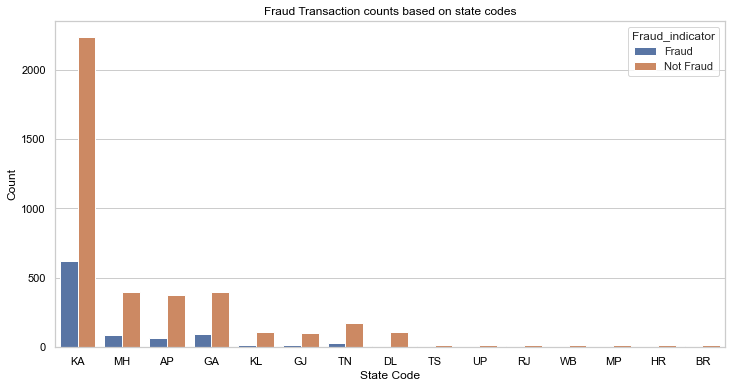

In [122]:
plt.figure(figsize=(12,6))
sns.set_theme(style='whitegrid')

sns.countplot(
    x='state_code',
    data=df,
    hue='Fraud_indicator'
)

plt.title('Fraud Transaction counts based on state codes', color="black")
plt.xlabel("State Code", color="black")
plt.ylabel("Count", color="black")

plt.xticks(color="black")
plt.yticks(color="black")

plt.show()





In [123]:
df['state_code'].value_counts()


KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: state_code, dtype: int64

In [124]:
df.loc[df['Fraud_indicator']=='Fraud','state_code'].value_counts()

KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: state_code, dtype: int64

Observation 3
1.Highest Fraud counts is in Karnatka(KA)

In [125]:
#analysie Timestamp to get the fraud/notfraud on day
df['Timestamp'][0]

'1/6/2023 11:20'

In [126]:
#convert timestamp into dataframe(datetime)
#pd.to_datetime(df['Timestamp'])
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            5000 non-null   object        
 5   Lane_Type              5000 non-null   object        
 6   Vehicle_Dimensions     5000 non-null   object        
 7   Transaction_Amount     5000 non-null   int64         
 8   Amount_paid            5000 non-null   int64         
 9   Geographical_Location  5000 non-null   object        
 10  Vehicle_Speed          5000 non-null   int64         
 11  Fraud_indicator        5000 non-null   object        
 12  state_code             5000 non-null   object        
dtypes: 

In [128]:
df['Hour'] =df['Timestamp'].dt.hour
df['DayofWeek'] =df['Timestamp'].dt.dayofweek
df['Month'] =df['Timestamp'].dt.month


In [129]:
df.head()


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,state_code,Hour,DayofWeek,Month
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA,11,4,1
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA,14,5,1
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA,18,6,1
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA,2,0,1
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA,6,1,1


In [130]:
#drop time stames features
df=df.drop('Timestamp',axis=1)

In [131]:
df['DayofWeek'].value_counts()

6    743
1    728
0    716
4    713
5    709
2    697
3    694
Name: DayofWeek, dtype: int64

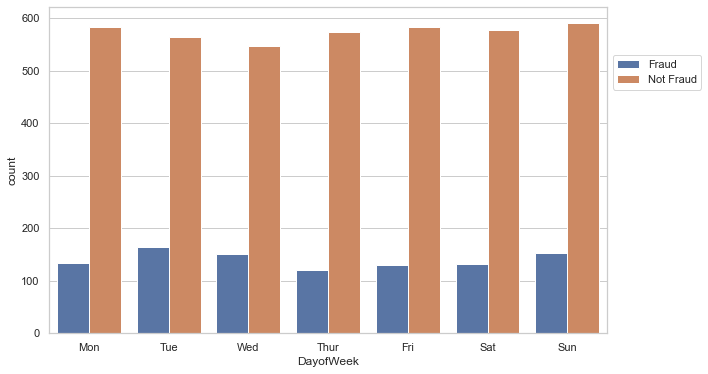

In [132]:
#visualise based on days
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='DayofWeek',
              hue='Fraud_indicator')
plt.legend(loc='center left',bbox_to_anchor=(1,0.8))
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.show()

Correlation Matrix

In [133]:
numericalDf=df.select_dtypes('number') #only Numerical Data


In [134]:
corr_maytix=numericalDf.corr()
corr_maytix

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,DayofWeek,Month
Transaction_ID,1.000000,-0.023515,0.044433,0.014378,-0.023208,0.002446,0.260075
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229,-0.036980,-0.001813,-0.019824
Amount_paid,0.044433,0.870078,1.000000,0.039027,-0.026358,-0.002960,0.018105
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000,-0.002259,-0.017608,0.015349
Hour,-0.023208,-0.036980,-0.026358,-0.002259,1.000000,-0.010292,0.001041
DayofWeek,0.002446,-0.001813,-0.002960,-0.017608,-0.010292,1.000000,0.002552
Month,0.260075,-0.019824,0.018105,0.015349,0.001041,0.002552,1.000000


<AxesSubplot:>

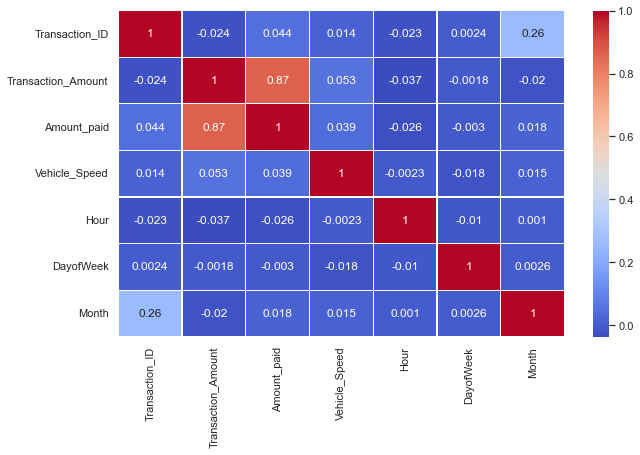

In [135]:
#plot corelation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_maytix,
            cmap='coolwarm',annot=True,linewidths=.2)

In [136]:
df.columns

Index(['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator',
       'state_code', 'Hour', 'DayofWeek', 'Month'],
      dtype='object')

In [137]:
# remove unecessary columns
df.drop(['Transaction_ID','Geographical_Location'],axis = 1,inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   FastagID            4451 non-null   object
 2   TollBoothID         5000 non-null   object
 3   Lane_Type           5000 non-null   object
 4   Vehicle_Dimensions  5000 non-null   object
 5   Transaction_Amount  5000 non-null   int64 
 6   Amount_paid         5000 non-null   int64 
 7   Vehicle_Speed       5000 non-null   int64 
 8   Fraud_indicator     5000 non-null   object
 9   state_code          5000 non-null   object
 10  Hour                5000 non-null   int64 
 11  DayofWeek           5000 non-null   int64 
 12  Month               5000 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 507.9+ KB


In [139]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [140]:
objectColums = ['Vehicle_Type','Lane_Type','Vehicle_Dimensions','TollBoothID','state_code','Fraud_indicator']
label_encoder = {}
for column in objectColums:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoder[column] = le


In [141]:
df.head()

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code,Hour,DayofWeek,Month
0,0,FTG-001-ABC-121,0,0,0,350,120,65,0,6,11,4,1
1,1,FTG-002-XYZ-451,1,1,2,120,100,78,0,6,14,5,1
2,2,NaN,3,1,2,0,0,53,1,6,18,6,1
3,5,FTG-044-LMN-322,2,1,0,350,120,92,0,6,2,0,1
4,6,FTG-505-DEF-652,1,0,1,140,100,60,0,6,6,1,1


In [142]:
label_encoder

{'Vehicle_Type': LabelEncoder(),
 'Lane_Type': LabelEncoder(),
 'Vehicle_Dimensions': LabelEncoder(),
 'TollBoothID': LabelEncoder(),
 'state_code': LabelEncoder(),
 'Fraud_indicator': LabelEncoder()}

In [143]:
label_encoder['Lane_Type'].classes_

array(['Express', 'Regular'], dtype=object)

Model Training

In [144]:
#X=df.drop(columns=['Fraud_indicator'])
#y=df['Fraud_indicator']
X = df.drop(["Fraud_indicator", "FastagID"], axis=1)
y = df["Fraud_indicator"]

In [145]:
#Split the x and y in train and tresting
from sklearn.model_selection import train_test_split
le = LabelEncoder()

X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [146]:
print("X_Train: ",X_train.shape)
print("X_Test: ",X_test.shape)
print("y_Train: ",y_train.shape)
print("y_Test: ",y_test.shape)


X_Train:  (3500, 11)
X_Test:  (1500, 11)
y_Train:  (3500,)
y_Test:  (1500,)


Logistic Regression

In [147]:
#import the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model

LogisticRegression()

In [148]:
lr_model.fit(X_train,y_train)

c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [149]:
#predict
y_pred=lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [150]:
#import libraries for matrics
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [151]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
precision= precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("LR model results: ")
print("Confusion Matrix",conf_matrix)
print("\nAccuracy ",accuracy)
print("\nPrecision: ",precision)
print("\nF1 Score: ",f1)

LR model results: 
Confusion Matrix [[ 302   25]
 [   0 1173]]

Accuracy  0.9833333333333333

Precision:  0.9791318864774624

F1 Score:  0.9894559257697174


In [152]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       327
           1       0.98      1.00      0.99      1173

    accuracy                           0.98      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [153]:
#function to evaluate model
###def evaluate_model(y_test,y_pred):
   #accuracy = accuracy_score(y_test,y_pred)
   #conf_matrix=confusion_matrix(y_test,y_pred)
   #precision= precision_score(y_test,y_pred)
   #recall = recall_score(y_test,y_pred)
   #f1=f1_score(y_test,y_pred)

   #print("Confusion Matrix",conf_matrix)
   #print("\nAccuracy ",accuracy)
   #print("\nRECALL: ",recall)
   #print("\nPrecision: ",precision)
   #print("\nF1 Score: ",f1)
def evaluate_model(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    print("Confusion Matrix",conf_matrix)
    print("\nAccuracy ",accuracy)
    print("\nRECALL: ",recall)
    print("\nPrecision: ",precision)
    print("\nF1 Score: ",f1)


In [154]:
#testing all models
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [155]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_tree_pred = tree_model.predict(X_test)
y_tree_pred

array([1, 1, 1, ..., 1, 1, 1])

In [156]:
#Accuracy of Decision tree
print("Decision Tree Model Evaluation:\n")
evaluate_model(y_test,y_tree_pred)

Decision Tree Model Evaluation:

Confusion Matrix [[ 325    2]
 [   0 1173]]

Accuracy  0.9986666666666667

RECALL:  1.0

Precision:  0.9982978723404256

F1 Score:  0.9991482112436115


In [157]:
#Random Forest
rf_model= RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_y_pred = rf_model.predict(X_test)
#accuracy
print("Random Forest Model Evaluation: ")
evaluate_model(y_test,rf_y_pred)

Random Forest Model Evaluation: 
Confusion Matrix [[ 305   22]
 [   0 1173]]

Accuracy  0.9853333333333333

RECALL:  1.0

Precision:  0.9815899581589959

F1 Score:  0.9907094594594595


Support Vector Machine

In [158]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)


SVC()

In [159]:
svc_y_pred = svc_model.predict(X_test)
#accuracy
print("Support Vector  Model Evaluation: ")
evaluate_model(y_test,svc_y_pred)

Support Vector  Model Evaluation: 
Confusion Matrix [[ 296   31]
 [   0 1173]]

Accuracy  0.9793333333333333

RECALL:  1.0

Precision:  0.9742524916943521

F1 Score:  0.9869583508624316


KNN

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [161]:
knn_y_pred=knnModel.predict(X_test)
#accuracy
print("KNN Classifier Model Evaluation: ")
evaluate_model(y_test,knn_y_pred)

KNN Classifier Model Evaluation: 
Confusion Matrix [[ 308   19]
 [   0 1173]]

Accuracy  0.9873333333333333

RECALL:  1.0

Precision:  0.9840604026845637

F1 Score:  0.9919661733615222


Text(0.5, 1.0, 'Comparison of accuracy Scores of different models')

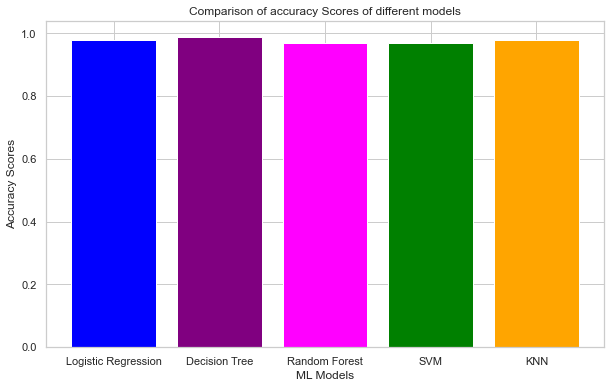

In [162]:
#Lets Visualized
model = ['Logistic Regression','Decision Tree','Random Forest','SVM','KNN']
accuracy_score=[0.98,0.99,0.97,0.97,0.98]
colors=['blue','purple','magenta','green','orange']
plt.figure(figsize=(10,6))
plt.bar(model,accuracy_score,color=colors)
plt.xlabel('ML Models')
plt.ylabel('Accuracy Scores')
plt.title("Comparison of accuracy Scores of different models")

Precision Value and Recall
             Actual Valuews-->
 Pridicted         1    0
 value |         1 TP   FP
       |         0 FN   TN
       |
       v
  To reduce the Precision we need to reduce in FP
  To reduce the Recall we need to reduce in FN


# Conclusion
1. Decision Tree
  - highest Accuracy (99%)




Additional/Optional Code
Here we will use RandomSearch CV to select best params

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [164]:
rf_params = params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5,8,15,20,None],
    'max_features':[5,6,7,"auto "],
    'min_samples_split': [2, 8, 15],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}


In [165]:
randomcv_models = [("RF",RandomForestClassifier(),rf_params)]


In [166]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, 20, None],
   'max_features': [5, 6, 7, 'auto '],
   'min_samples_split': [2, 8, 15]})]

In [167]:
model_params={}
for name ,model,params in randomcv_models:
    random= RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=20,
                               cv=3,
                               verbose=2,
                               n_jobs = 1)
    random.fit(X_train,y_train)
    model_params[name]=random.best_params_



Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=15, max_features=auto , min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto , min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=15, max_features=auto , min_samples_split=2, n_estimators=100; total time=   0.0s


c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=5, max_features=auto , min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto , min_samples_split=15, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto , min_samples_split=15, n_estimators=100; total time=   0.0s


c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\p

[CV] END max_depth=15, max_features=6, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, max_features=6, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, max_features=6, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=15, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=6, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=6, min_samples_split=15, n_estimators=100; total time=   0.2s


c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=auto , min_samples_split=8, n_estimators=500; total time=   0.2s
[CV] END max_depth=5, max_features=auto , min_samples_split=8, n_estimators=500; total time=   0.1s


c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\p

[CV] END max_depth=5, max_features=auto , min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   0.8s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=6, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_feature

c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\Priyanshu Bhaskar\.conda\envs\myenv\lib\site-packages\joblib\p

In [168]:
model_params

{'RF': {'n_estimators': 100,
  'min_samples_split': 8,
  'max_features': 7,
  'max_depth': None}}

In [169]:
rf_model_2 = RandomForestClassifier(n_estimators= 100,
  min_samples_split= 15,
  max_features= 6,
  max_depth= None)
rf_model_2.fit(X_train,y_train)

RandomForestClassifier(max_features=6, min_samples_split=15)

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#rf_y_pred = rf_model_2.predict(X_test)

#print("RF Model Evaluation:")
#evaluate_model(y_test, rf_y_pred2)

rf_y_pred = rf_model_2.predict(X_test)
print("RF Model Evaluation: ")
evaluate_model(y_test,rf_y_pred)

RF Model Evaluation: 
Confusion Matrix [[ 317   10]
 [   0 1173]]

Accuracy  0.9933333333333333

RECALL:  1.0

Precision:  0.9915469146238377

F1 Score:  0.9957555178268251


Random Forest Model Evaluation: 
Confusion Matrix [[ 305   22]
 [   0 1173]]

Accuracy  0.9853333333333333

RECALL:  1.0

Precision:  0.9815899581589959

F1 Score:  0.9907094594594595
---------------------------------------------------------------
After Selecting Parameter

RF Model Evaluation: 
Confusion Matrix [[ 317   10]
 [   0 1173]]

Accuracy  0.9933333333333333

RECALL:  1.0

Precision:  0.9915469146238377

F1 Score:  0.9957555178268251
---------------------------------------------------------------
